# Ingeniería de Características: Creación de Nuevas Variables (Core) / Elida Peña

**Descripción:**

En esta actividad, trabajarás con el dataset «Titanic – Machine Learning from Disaster» disponible en Kaggle para realizar ingeniería de características. El objetivo es crear nuevas variables a partir de las existentes y evaluar cómo estas nuevas características pueden mejorar la capacidad predictiva de un modelo de machine learning.

Enlace al dataset: https://www.kaggle.com/c/titanic

**Objetivo:**

El objetivo principal es desarrollar habilidades en la creación de nuevas variables que capturen información útil no presente en las variables originales. Estas nuevas características serán utilizadas para mejorar el rendimiento de un modelo de clasificación que prediga la supervivencia de los pasajeros del Titanic.


**Instrucciones:**

1. Carga de datos:
  – Descarga y carga el dataset «Titanic» desde Kaggle. Realiza una exploración inicial de las variables disponibles, que incluyen información sobre la edad, el género, la clase del pasajero, entre otros.
  – Examina cuántos valores faltan en las variables importantes como la edad y el precio del boleto.

2. Exploración y preprocesamiento de datos:
  – Realiza una limpieza de los datos, manejando los valores nulos. Por ejemplo, puedes imputar los valores faltantes de la edad con la mediana o la media según sea conveniente.
  – Revisa la distribución de las variables y asegúrate de que las categorías estén codificadas correctamente para el modelado.

3. Creación de nuevas características:
  – Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:
    – Tamaño de la familia: Combina las variables «SibSp» (número de hermanos/esposos) y «Parch» (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.
    – Cabina desconocida: Crea una variable binaria que indique si la cabina de un pasajero es conocida o no, lo cual podría estar relacionado con la clase o la ubicación a bordo.
    – Categoría de tarifa: Agrupa la variable «Fare» en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.
    – Título del pasajero: Extrae el título de cada pasajero desde la variable «Name» y crea una nueva variable categórica que represente estos títulos (e.g., Mr., Mrs., Miss.).

4. Evaluación de nuevas características:
  – Aplica un modelo de machine learning (como un modelo de regresión logística o un árbol de decisión) antes y después de agregar las nuevas características para evaluar su impacto en el rendimiento del modelo.
  – Utiliza métricas como la exactitud y el F1-score para comparar el rendimiento con y sin las nuevas variables.

5. Interpretación de los resultados:
  – Analiza cuáles de las nuevas características tuvieron el mayor impacto en el rendimiento del modelo. ¿Cómo ayudaron a mejorar la capacidad predictiva del modelo en comparación con las variables originales?
  – Discute cómo las nuevas características creadas representan una mejor captura de la información sobre los pasajeros.


**Análisis de Resultados:**

  – El análisis debe centrarse en la importancia de las nuevas variables y su capacidad para mejorar la predicción de la supervivencia en el Titanic. Discute los beneficios de realizar ingeniería de características y cómo estas nuevas variables pueden capturar información latente en los datos originales.

In [2]:
# Paso 1: Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Ruta al archivo descargado
ruta_dataset = "../data/Titanic-Dataset.csv"  # Cambia esta ruta según la ubicación de tu archivo

# Cargar el dataset
df = pd.read_csv(ruta_dataset)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset Titanic:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Verificar valores nulos
print("\nNúmero de valores nulos por columna:")
print(df.isnull().sum())

Primeras filas del dataset Titanic:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0           

In [5]:
# Paso 2: Preprocesamiento de Datos

# Imputar valores nulos en la columna 'Age' con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

# Imputar valores nulos en 'Embarked' con la moda
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Imputar valores nulos en 'Fare' con la mediana
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Crear una columna binaria para pasajeros con cabina conocida o no
df['Cabin_Known'] = df['Cabin'].notnull().astype(int)

# Verificar valores nulos restantes
print("\nValores nulos restantes después del preprocesamiento:")
print(df.isnull().sum())



Valores nulos restantes después del preprocesamiento:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_Known      0
dtype: int64


C:\Users\59598\AppData\Local\Temp\ipykernel_9060\4042860108.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\59598\AppData\Local\Temp\ipykernel_9060\4042860108.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [6]:
# Paso 3: Creación de nuevas características

# Tamaño de la familia (SibSp + Parch + 1 para incluir al pasajero)
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

# Agrupar tarifas en categorías (bajo, medio, alto)
df['Fare_Category'] = pd.cut(
    df['Fare'],
    bins=[-1, 7.91, 14.454, 31, 513],
    labels=['Low', 'Medium', 'High', 'Very High']
)

# Extraer el título del pasajero desde el nombre
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplificar los títulos
title_mapping = {
    "Capt": "Rare", "Col": "Rare", "Major": "Rare", "Dr": "Rare", "Rev": "Rare", 
    "Jonkheer": "Rare", "Dona": "Rare", "Countess": "Rare", "Lady": "Rare",
    "Sir": "Rare", "Don": "Rare", "Mme": "Mrs", "Ms": "Miss", "Mlle": "Miss"
}
df['Title'] = df['Title'].replace(title_mapping)
df['Title'] = df['Title'].replace(["Rare"], "Other")

# Verificar las nuevas columnas creadas
print("\nPrimeras filas con las nuevas características:")
print(df[['Family_Size', 'Fare_Category', 'Title', 'Cabin_Known']].head())



Primeras filas con las nuevas características:
   Family_Size Fare_Category Title  Cabin_Known
0            2           Low    Mr            0
1            2     Very High   Mrs            1
2            1        Medium  Miss            0
3            2     Very High   Mrs            1
4            1        Medium    Mr            0


In [7]:
# Paso 4: Evaluación del modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Seleccionar características iniciales y luego agregar las nuevas características
X_base = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
X_base = pd.get_dummies(X_base, columns=['Sex'], drop_first=True)

X_new = df[['Pclass', 'Age', 'Family_Size', 'Fare_Category', 'Title', 'Cabin_Known']]
X_new = pd.get_dummies(X_new, columns=['Fare_Category', 'Title'], drop_first=True)

# Etiqueta objetivo
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_base, X_test_base, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
X_train_new, X_test_new, _, _ = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Entrenar el modelo con las características iniciales
clf_base = RandomForestClassifier(random_state=42)
clf_base.fit(X_train_base, y_train)
y_pred_base = clf_base.predict(X_test_base)

# Entrenar el modelo con las nuevas características
clf_new = RandomForestClassifier(random_state=42)
clf_new.fit(X_train_new, y_train)
y_pred_new = clf_new.predict(X_test_new)

# Evaluar el rendimiento
print("\nRendimiento con características iniciales:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_base):.4f}")

print("\nRendimiento con nuevas características:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_new):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_new):.4f}")



Rendimiento con características iniciales:
Accuracy: 0.8101
F1 Score: 0.7639

Rendimiento con nuevas características:
Accuracy: 0.8101
F1 Score: 0.7792



Importancia de las características:
Age                        0.341009
Title_Mr                   0.188640
Family_Size                0.105131
Pclass                     0.089321
Title_Mrs                  0.086733
Title_Miss                 0.060755
Cabin_Known                0.048588
Fare_Category_Medium       0.024069
Fare_Category_Very High    0.023960
Fare_Category_High         0.016902
Title_Other                0.014892
dtype: float64


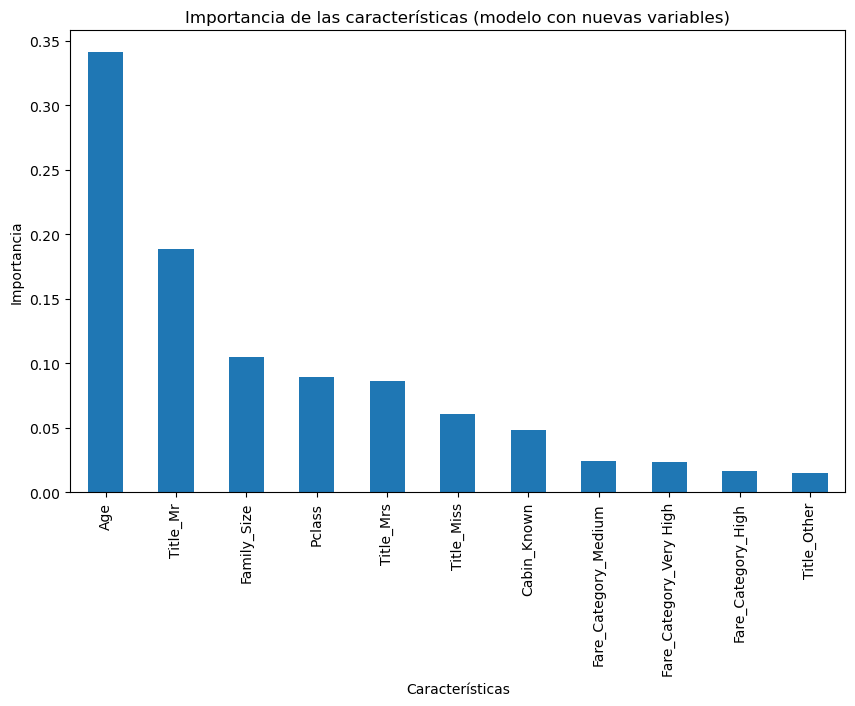

In [8]:
# Paso 5: Importancia de las características
importances = pd.Series(clf_new.feature_importances_, index=X_new.columns)
importances = importances.sort_values(ascending=False)

print("\nImportancia de las características:")
print(importances)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Importancia de las características (modelo con nuevas variables)')
plt.ylabel('Importancia')
plt.xlabel('Características')
plt.show()
